In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image

import torch 
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms, Resize
from tqdm import tqdm

In [2]:
# image size: mean width and length -> round up for perfekt 3/4 ratio -> (256, 192)

In [3]:
class ImageNetSubset(Dataset):
    def __init__(self):
        self.class_mapping = {
            'coffee-mug': 0,
            'notebook': 1,
            'remote-control': 2,
            'soup-bowl': 3,
            'teapot': 4,
            'wooden-spoon': 5,
            'computer-keyboard': 6,
            'mouse': 7,
            'binder': 8,
            'toilet-tissue': 9
        }

        DATA_PATH = os.path.join('..', 'data', 'ImageNetSubset')
        file_names = os.listdir(DATA_PATH)

        self.n_samples = len(file_names)

        transform_compose = transforms.Compose([transforms.PILToTensor()])
        transform_resize = transforms.Resize(size=(256, 192))

        img_tensor = torch.empty(self.n_samples, 3, 256, 192, dtype=torch.int32)
        label_tensor = torch.empty(self.n_samples, dtype=torch.int32)

        print('Data loading progress:', end='')
        for i in tqdm(range(self.n_samples)):
            IMG_PATH = os.path.join('..', 'data', 'ImageNetSubset', file_names[i])

            label_str = file_names[i].split('_')[0]
            label_int = self.class_mapping[label_str]

            image = Image.open(IMG_PATH)
            image_t = transform_compose(image)
            image_t = transform_resize(image_t)

            img_tensor[i] = image_t
            label_tensor[i] = label_int

        self.x = img_tensor
        self.y = label_tensor


    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self) -> int:
        return self.n_samples

In [4]:
subset = ImageNetSubset()

Data loading progress:

100%|██████████| 13500/13500 [01:46<00:00, 126.41it/s]


binder


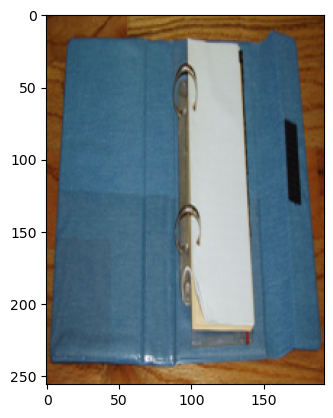

In [6]:
x, y = subset[1001]

print(list(subset.class_mapping)[y])
plt.imshow(x.permute(1, 2, 0))